## Installs and imports

In [1]:
!pip install chembl_webresource_client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.8/124.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.6/197.6 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.4 MB/s eta 0:00:00
  Created wheel for easydict: filename=easydict-1.10-py3-none-any.whl size=6492 sha256=be24365d02c09440bef22413b7120eb10ab290c466de18a7f95788ed7a0d4bde
  Stored in directory: /Users/jgmacbook/Library/Caches/pip/wheels/b7/e3/8c/f814820ac7ef5fd96f38759ce0d3dc51166a3169008b31da53
Successfully built easydict
  Attempt

In [2]:
!pip install deepchem

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.2/693.2 kB 5.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 MB 19.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 17.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.1
    Uninstalling scipy-1.9.1:
      Successfully uninstalled scipy-1.9.1

[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [4]:
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 1.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import math
from pathlib import Path
from zipfile import ZipFile
from tempfile import TemporaryDirectory

import numpy as np
import pandas as pd

from rdkit.Chem import PandasTools

from chembl_webresource_client.new_client import new_client
from tqdm.auto import tqdm

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Retrieve data from ChEMBL (this takes many hours to run)

In [6]:
targets_api = new_client.target
compounds_api = new_client.molecule
bioactivities_api = new_client.activity
type(targets_api)

chembl_webresource_client.query_set.QuerySet

In [7]:
bioactivities = bioactivities_api.filter(
    target_chembl_id='CHEMBL395', assay_chembl_id ="CHEMBL1794553"
).only(
    "activity_id",
    "assay_chembl_id",
    "assay_description",
    "assay_type",
    "molecule_chembl_id",
    "type",
    "standard_units",
    "relation",
    "standard_value",
    "target_chembl_id",
    "target_organism",
)
len(bioactivities)

58459

In [10]:
bioactivities_df = pd.DataFrame.from_records(bioactivities)
print(f"DataFrame shape: {bioactivities_df.shape}")
bioactivities_df.head()

DataFrame shape: (58460, 13)


,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type,units,value
0,6961561,CHEMBL1794553,PUBCHEM_BIOASSAY: qHTS for Inhibitors of TGF-b...,F,CHEMBL1315471,None,nM,35481.3,CHEMBL395,Homo sapiens,Potency,uM,35.4813
1,6958176,CHEMBL1794553,PUBCHEM_BIOASSAY: qHTS for Inhibitors of TGF-b...,F,CHEMBL1511566,None,nM,2818.4,CHEMBL395,Homo sapiens,Potency,uM,2.8184
2,6958177,CHEMBL1794553,PUBCHEM_BIOASSAY: qHTS for Inhibitors of TGF-b...,F,CHEMBL1904108,None,nM,35481.3,CHEMBL395,Homo sapiens,Potency,uM,35.4813
3,6958178,CHEMBL1794553,PUBCHEM_BIOASSAY: qHTS for Inhibitors of TGF-b...,F,CHEMBL1369478,None,nM,35481.3,CHEMBL395,Homo sapiens,Potency,uM,35.4813
4,6958179,CHEMBL1794553,PUBCHEM_BIOASSAY: qHTS for Inhibitors of TGF-b...,F,CHEMBL1200833,None,nM,12589.3,CHEMBL395,Homo sapiens,Potency,uM,12.5893


In [11]:
bioactivities_df.to_csv("HepG2_Bioactives_df.csv")

In [21]:
bioactivities_df = pd.read_csv("HepG2_Bioactives_df.csv")

In [22]:
bioactivities_df.head()

,Unnamed: 0,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type,units,value
0,0,6961561,CHEMBL1794553,PUBCHEM_BIOASSAY: qHTS for Inhibitors of TGF-b...,F,CHEMBL1315471,NaN,nM,35481.3,CHEMBL395,Homo sapiens,Potency,uM,35.4813
1,1,6958176,CHEMBL1794553,PUBCHEM_BIOASSAY: qHTS for Inhibitors of TGF-b...,F,CHEMBL1511566,NaN,nM,2818.4,CHEMBL395,Homo sapiens,Potency,uM,2.8184
2,2,6958177,CHEMBL1794553,PUBCHEM_BIOASSAY: qHTS for Inhibitors of TGF-b...,F,CHEMBL1904108,NaN,nM,35481.3,CHEMBL395,Homo sapiens,Potency,uM,35.4813
3,3,6958178,CHEMBL1794553,PUBCHEM_BIOASSAY: qHTS for Inhibitors of TGF-b...,F,CHEMBL1369478,NaN,nM,35481.3,CHEMBL395,Homo sapiens,Potency,uM,35.4813
4,4,6958179,CHEMBL1794553,PUBCHEM_BIOASSAY: qHTS for Inhibitors of TGF-b...,F,CHEMBL1200833,NaN,nM,12589.3,CHEMBL395,Homo sapiens,Potency,uM,12.5893


In [23]:
bioactivities_df["standard_units"].unique()

array(['nM'], dtype=object)

In [24]:
bioactivities_df.drop(["units", "value"], axis=1, inplace=True)
bioactivities_df.drop_duplicates("molecule_chembl_id", keep="first", inplace=True)
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (58172, 12)


In [25]:
bioactivities_df.reset_index(drop=True, inplace=True)
bioactivities_df.head()

,Unnamed: 0,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type
0,0,6961561,CHEMBL1794553,PUBCHEM_BIOASSAY: qHTS for Inhibitors of TGF-b...,F,CHEMBL1315471,NaN,nM,35481.3,CHEMBL395,Homo sapiens,Potency
1,1,6958176,CHEMBL1794553,PUBCHEM_BIOASSAY: qHTS for Inhibitors of TGF-b...,F,CHEMBL1511566,NaN,nM,2818.4,CHEMBL395,Homo sapiens,Potency
2,2,6958177,CHEMBL1794553,PUBCHEM_BIOASSAY: qHTS for Inhibitors of TGF-b...,F,CHEMBL1904108,NaN,nM,35481.3,CHEMBL395,Homo sapiens,Potency
3,3,6958178,CHEMBL1794553,PUBCHEM_BIOASSAY: qHTS for Inhibitors of TGF-b...,F,CHEMBL1369478,NaN,nM,35481.3,CHEMBL395,Homo sapiens,Potency
4,4,6958179,CHEMBL1794553,PUBCHEM_BIOASSAY: qHTS for Inhibitors of TGF-b...,F,CHEMBL1200833,NaN,nM,12589.3,CHEMBL395,Homo sapiens,Potency


In [26]:
bioactivities_df.rename(
    columns={"standard_value": "IC50", "standard_units": "units"}, inplace=True
)
bioactivities_df.head()

,Unnamed: 0,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,units,IC50,target_chembl_id,target_organism,type
0,0,6961561,CHEMBL1794553,PUBCHEM_BIOASSAY: qHTS for Inhibitors of TGF-b...,F,CHEMBL1315471,NaN,nM,35481.3,CHEMBL395,Homo sapiens,Potency
1,1,6958176,CHEMBL1794553,PUBCHEM_BIOASSAY: qHTS for Inhibitors of TGF-b...,F,CHEMBL1511566,NaN,nM,2818.4,CHEMBL395,Homo sapiens,Potency
2,2,6958177,CHEMBL1794553,PUBCHEM_BIOASSAY: qHTS for Inhibitors of TGF-b...,F,CHEMBL1904108,NaN,nM,35481.3,CHEMBL395,Homo sapiens,Potency
3,3,6958178,CHEMBL1794553,PUBCHEM_BIOASSAY: qHTS for Inhibitors of TGF-b...,F,CHEMBL1369478,NaN,nM,35481.3,CHEMBL395,Homo sapiens,Potency
4,4,6958179,CHEMBL1794553,PUBCHEM_BIOASSAY: qHTS for Inhibitors of TGF-b...,F,CHEMBL1200833,NaN,nM,12589.3,CHEMBL395,Homo sapiens,Potency


In [27]:
bioactivities_df.to_csv("HepG2_Bioactives_df_partialCleaning.csv")

In [28]:
compounds_provider = compounds_api.filter(
    molecule_chembl_id__in=list(bioactivities_df["molecule_chembl_id"])
).only("molecule_chembl_id", "molecule_structures")

In [30]:
len(compounds_provider)

58172

In [37]:
compounds = list(tqdm(compounds_provider))
compounds_df = pd.DataFrame.from_records(
    compounds,
)
print(f"DataFrame shape: {compounds_df.shape}")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 58172/58172 [2:42:08<00:00,  5.98it/s]

DataFrame shape: (58172, 2)


In [38]:
compounds_df.to_csv("HepG2_compounds_df.csv")

In [39]:
compounds_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (58135, 2)


In [40]:
compounds_df.drop_duplicates("molecule_chembl_id", keep="first", inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (58135, 2)


In [41]:
compounds_df.iloc[0].molecule_structures.keys()

dict_keys(['canonical_smiles', 'molfile', 'standard_inchi', 'standard_inchi_key'])

In [42]:
canonical_smiles = []

for i, compounds in compounds_df.iterrows():
    try:
        canonical_smiles.append(compounds["molecule_structures"]["canonical_smiles"])
    except KeyError:
        canonical_smiles.append(None)

compounds_df["smiles"] = canonical_smiles
compounds_df.drop("molecule_structures", axis=1, inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (58135, 2)


In [43]:
compounds_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (58135, 2)


In [44]:
compounds_df.to_csv("hepg2_compoundsdf_clean.csv")

In [45]:
output_df = pd.merge(
    bioactivities_df[["molecule_chembl_id", "IC50", "units"]],
    compounds_df,
    on="molecule_chembl_id",
)

# Reset row indices
output_df.reset_index(drop=True, inplace=True)

print(f"Dataset with {output_df.shape[0]} entries.")

Dataset with 58135 entries.


In [46]:
output_df.head()

,molecule_chembl_id,IC50,units,smiles
0,CHEMBL1315471,35481.3,nM,CCN(CC(=O)NCc1cccs1)S(=O)(=O)c1cc(NC(C)=O)ccc1OC
1,CHEMBL1511566,2818.4,nM,O=C(CN(c1ccc(F)cc1)S(=O)(=O)c1ccc2c(c1)OCCO2)N...
2,CHEMBL1904108,35481.3,nM,O=C(CCN1C(=O)/C(=C\c2ccccc2F)SC1=S)N1CCOCC1
3,CHEMBL1369478,35481.3,nM,COc1cc2c(cc1OC)C(c1ccc(-c3ccc(Cl)c(Cl)c3)o1)=NCC2
4,CHEMBL1200833,12589.3,nM,CNCC(O)c1ccc(OC(=O)C(C)(C)C)c(OC(=O)C(C)(C)C)c...


In [47]:
output_df.to_csv("hepg2_output_df.csv")

In [78]:
output_df_subset = output_df[0:1000]

In [49]:
output_df_subset

,molecule_chembl_id,IC50,units,smiles
0,CHEMBL1315471,35481.3,nM,CCN(CC(=O)NCc1cccs1)S(=O)(=O)c1cc(NC(C)=O)ccc1OC
1,CHEMBL1511566,2818.4,nM,O=C(CN(c1ccc(F)cc1)S(=O)(=O)c1ccc2c(c1)OCCO2)N...
2,CHEMBL1904108,35481.3,nM,O=C(CCN1C(=O)/C(=C\c2ccccc2F)SC1=S)N1CCOCC1
3,CHEMBL1369478,35481.3,nM,COc1cc2c(cc1OC)C(c1ccc(-c3ccc(Cl)c(Cl)c3)o1)=NCC2
4,CHEMBL1200833,12589.3,nM,CNCC(O)c1ccc(OC(=O)C(C)(C)C)c(OC(=O)C(C)(C)C)c...
...,...,...,...,...
95,CHEMBL1447365,2818.4,nM,O=C(Oc1ccc(C(=S)N2CCOCC2)cc1)c1cccc([N+](=O)[O...
96,CHEMBL1572160,7079.5,nM,CCC(NC(=O)c1cc(COc2cc(C)c(Cl)c(C)c2)on1)c1ccncc1
97,CHEMBL1435768,17782.8,nM,O=C(NCC(c1cccnc1)N1CCN(Cc2ccccc2)CC1)C(=O)Nc1c...
98,CHEMBL1603731,22387.2,nM,CCCCN=C(S)Nc1ccc([N+](=O)[O-])cc1


## Install mmpdb package

In [50]:
from rdkit.Chem import rdMMPA

In [51]:
!pip install mmpdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.3/188.3 kB 3.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


## Generate a .smi (smiles) file as input for mmpdb

In [ ]:
ouput_df.loc[:,["smiles","molecule_chembl_id"]].to_csv("AllHepG2Cmpds.smi", sep="\t", header=False, index=False)

## Fragment the HepG2 molecules

In [82]:
!mmpdb fragment AllHepG2Cmpds.smi -o AllHepG2Cmpds.fragdb

Preparing record 13609[11:26:42] WARNING: not removing hydrogen atom without neighbors


In [255]:
output_df

NameError: name 'output_df' is not defined

In [90]:
import math
def compute_pIC50(IC50):
     return -math.log10(IC50*1e-9)

In [91]:
output_df['pCC50'] = output_df['IC50'].apply(compute_pIC50)

In [92]:
output_df.head()

,molecule_chembl_id,IC50,units,smiles,pCC50
0,CHEMBL1315471,35481.3,nM,CCN(CC(=O)NCc1cccs1)S(=O)(=O)c1cc(NC(C)=O)ccc1OC,4.450000
1,CHEMBL1511566,2818.4,nM,O=C(CN(c1ccc(F)cc1)S(=O)(=O)c1ccc2c(c1)OCCO2)N...,5.549997
2,CHEMBL1904108,35481.3,nM,O=C(CCN1C(=O)/C(=C\c2ccccc2F)SC1=S)N1CCOCC1,4.450000
3,CHEMBL1369478,35481.3,nM,COc1cc2c(cc1OC)C(c1ccc(-c3ccc(Cl)c(Cl)c3)o1)=NCC2,4.450000
4,CHEMBL1200833,12589.3,nM,CNCC(O)c1ccc(OC(=O)C(C)(C)C)c(OC(=O)C(C)(C)C)c...,4.899998


In [103]:
output_df.describe()

,IC50,pCC50
count,58135.000000,58135.000000
mean,15868.624816,5.058837
std,12694.115424,0.614363
min,39.800000,4.350000
25%,4466.800000,4.599999
50%,12589.300000,4.899998
75%,25118.900000,5.350003
max,44668.400000,7.400117


In [117]:
data_df = output_df.loc[:,["molecule_chembl_id","pCC50"]]
data_df.rename(columns={"molecule_chembl_id":"id"}, inplace=True)
data_df.to_csv("AllHepG2Data.csv",sep="\t", index=False)

In [118]:
!mmpdb index AllHepG2Cmpds.fragdb -o AllHepG2.mmpdb --properties AllHepG2Data.csv

In [119]:
!mmpdb transform --help

usage: mmpdb transform [-h] --smiles SMILES [--min-variable-size N]
                       [--min-constant-size N] [--min-radius {0,1,2,3,4,5}]
                       [--min-pairs N] [--substructure SMARTS]
                       [--property NAME] [--no-properties] [--where EXPR]
                       [--score EXPR] [--rule-selection-cutoffs LIST]
                       [--in-memory] [--jobs JOBS] [--explain]
                       [--output FILENAME] [--times]
                       DATABASE

positional arguments:
  DATABASE              location of the database (eg, 'csd.mmpdb')

options:
  -h, --help            show this help message and exit
  --smiles SMILES, -s SMILES
                        the base structure to transform
  --min-variable-size N
                        require at least N atoms in the variable fragment
                        (default: 0)
  --min-constant-size N
                        require at least N atoms in the constant fragment
                        (de

In [120]:
output_df.loc[1, "smiles"]

'O=C(CN(c1ccc(F)cc1)S(=O)(=O)c1ccc2c(c1)OCCO2)Nc1ccccc1'

In [12]:
!mmpdb transform -s "C1=CC=CC=C1C" AllHepG2.mmpdb -p pCC50 --where "avg<-1"

ID	SMILES	pCC50_from_smiles	pCC50_to_smiles	pCC50_radius	pCC50_fingerprint	pCC50_rule_environment_id	pCC50_count	pCC50_avg	pCC50_std	pCC50_kurtosis	pCC50_skewness	pCC50_min	pCC50_q1	pCC50_median	pCC50_q3	pCC50_max	pCC50_paired_t	pCC50_p_value
1	Brc1cc(Br)c[n+](Cc2ccccc2)c1	[*:1]C	[*:1]C[n+]1cc(Br)cc(Br)c1	0	59SlQURkWt98BOD1VlKTGRkiqFDbG6JVkeTJ3ex3bOA	225281	1	-1.4				-1.4	-1.4	-1.4	-1.4	-1.4		
2	C#CCOC(=O)Nc1ccccc1	[*:1]C	[*:1]NC(=O)OCC#C	1	tLP3hvftAkp3EUY+MHSruGd0iZ/pu5nwnEwNA+NiAh8	2110771	1	-1.75				-1.75	-1.75	-1.75	-1.75	-1.75		
3	C(=C\c1ccccc1)\c1ccccc1	[*:1]C	[*:1]/C=C\c1ccccc1	1	tLP3hvftAkp3EUY+MHSruGd0iZ/pu5nwnEwNA+NiAh8	2180723	2	-1.6	0.91925			-2.25	-2.25	-1.6	-0.95	-0.95	2.4615	0.24566
4	C/C(Br)=C/c1ccccc1	[*:1]c1ccccc1	[*:1]/C(Br)=C/c1ccccc1	0	59SlQURkWt98BOD1VlKTGRkiqFDbG6JVkeTJ3ex3bOA	29508	1	-1.4499				-1.4499	-1.4499	-1.4499	-1.4499	-1.4499		
5	C/C=C/C(=O)NC	[*:1]c1ccccc1	[*:1]NC(=O)/C=C/C	0	59SlQURkWt98BOD1VlKTGRkiqFDbG6JVkeTJ3ex3bOA	2083041	1	-1.25				-1.25	-1.25	-1.

In [144]:
ideas_df = pd.read_csv("out.txt",sep="\t")

In [145]:
ideas_df

,ID,SMILES,pCC50_from_smiles,pCC50_to_smiles,pCC50_radius,pCC50_fingerprint,pCC50_rule_environment_id,pCC50_count,pCC50_avg,pCC50_std,pCC50_kurtosis,pCC50_skewness,pCC50_min,pCC50_q1,pCC50_median,pCC50_q3,pCC50_max,pCC50_paired_t,pCC50_p_value
0,1,C/C=C/C(=O)NNC(=O)CN(c1ccc(F)cc1)S(=O)(=O)c1cc...,[*:1]c1ccccc1,[*:1]NC(=O)/C=C/C,0,59SlQURkWt98BOD1VlKTGRkiqFDbG6JVkeTJ3ex3bOA,2083041,1,-1.250,NaN,NaN,NaN,-1.25,-1.25,-1.250,-1.25,-1.25,NaN,NaN
1,2,C=CCN(C(=S)NC(=O)CN(c1ccc(F)cc1)S(=O)(=O)c1ccc...,[*:2]NC([*:1])=O,[*:1]C(=O)NC(=S)N([*:2])CC=C,1,IsGBRMuGqMU6Doamz0OuTu6hmhQRk9HPOr/AantVgsQ,1036852,1,-1.000,NaN,NaN,NaN,-1.00,-1.00,-1.000,-1.00,-1.00,NaN,NaN
2,3,C=CN(CC(=O)Nc1ccccc1)S(=O)(=O)c1ccc2c(c1)OCCO2,[*:1]c1ccc(F)cc1,[*:1]C=C,0,59SlQURkWt98BOD1VlKTGRkiqFDbG6JVkeTJ3ex3bOA,1181138,2,-1.125,0.67174,NaN,NaN,-1.60,-1.60,-1.125,-0.65,-0.65,2.3685,0.25434
3,4,CC#CCC(CC#CC)N(CC(=O)Nc1ccccc1)S(=O)(=O)c1ccc2...,[*:1]c1ccc(F)cc1,[*:1]C(CC#CC)CC#CC,0,59SlQURkWt98BOD1VlKTGRkiqFDbG6JVkeTJ3ex3bOA,2170694,1,-1.750,NaN,NaN,NaN,-1.75,-1.75,-1.750,-1.75,-1.75,NaN,NaN
4,5,CC(=O)NC(CF)N(CC(=O)Nc1ccccc1)S(=O)(=O)c1ccc2c...,[*:1]c1ccc([*:2])cc1,[*:1]CC([*:2])NC(C)=O,0,8RcKhgVxyFGIHOg3PvZ5MD1YdRc7BcXP2EnyPQagHKw,84467,1,-1.450,NaN,NaN,NaN,-1.45,-1.45,-1.450,-1.45,-1.45,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,313,O=S(=O)(c1ccc2c(c1)OCCO2)N(c1ccc(F)cc1)c1n[nH]...,[*:1]CC(=O)Nc1ccccc1,[*:1]c1n[nH]c(-c2ccco2)n1,0,59SlQURkWt98BOD1VlKTGRkiqFDbG6JVkeTJ3ex3bOA,1432156,1,-2.100,NaN,NaN,NaN,-2.10,-2.10,-2.100,-2.10,-2.10,NaN,NaN
313,314,O=S(=O)(c1ccc2c(c1)OCCO2)N(c1ccc(F)cc1)c1nc(C(...,[*:1]CC(=O)Nc1ccccc1,[*:1]c1nc(C(F)(F)F)n[nH]1,0,59SlQURkWt98BOD1VlKTGRkiqFDbG6JVkeTJ3ex3bOA,1432090,1,-1.800,NaN,NaN,NaN,-1.80,-1.80,-1.800,-1.80,-1.80,NaN,NaN
314,315,O=S(=O)(c1ccc2c(c1)OCCO2)N(c1ccc(F)cc1)c1ncnc2...,[*:1]CC(=O)N[*:2],[*:2]Cn1ncc2c([*:1])ncnc21,0,8RcKhgVxyFGIHOg3PvZ5MD1YdRc7BcXP2EnyPQagHKw,1432246,1,-2.550,NaN,NaN,NaN,-2.55,-2.55,-2.550,-2.55,-2.55,NaN,NaN
315,316,O=c1c(-c2ccccc2)c(O)ccn1CN(c1ccc(F)cc1)S(=O)(=...,[*:1]NC([*:2])=O,[*:2]c1c(O)ccn([*:1])c1=O,0,8RcKhgVxyFGIHOg3PvZ5MD1YdRc7BcXP2EnyPQagHKw,1047139,1,-1.050,NaN,NaN,NaN,-1.05,-1.05,-1.050,-1.05,-1.05,NaN,NaN


In [148]:
PandasTools.AddMoleculeColumnToFrame(ideas_df,'pCC50_from_smiles','idea_mol')

,ID,SMILES,pCC50_from_smiles,pCC50_to_smiles,pCC50_radius,pCC50_fingerprint,pCC50_rule_environment_id,pCC50_count,pCC50_avg,pCC50_std,pCC50_kurtosis,pCC50_skewness,pCC50_min,pCC50_q1,pCC50_median,pCC50_q3,pCC50_max,pCC50_paired_t,pCC50_p_value,idea_mol
0,1,C/C=C/C(=O)NNC(=O)CN(c1ccc(F)cc1)S(=O)(=O)c1cc...,[*:1]c1ccccc1,[*:1]NC(=O)/C=C/C,0,59SlQURkWt98BOD1VlKTGRkiqFDbG6JVkeTJ3ex3bOA,2083041,1,-1.250,NaN,NaN,NaN,-1.25,-1.25,-1.250,-1.25,-1.25,NaN,NaN,
1,2,C=CCN(C(=S)NC(=O)CN(c1ccc(F)cc1)S(=O)(=O)c1ccc...,[*:2]NC([*:1])=O,[*:1]C(=O)NC(=S)N([*:2])CC=C,1,IsGBRMuGqMU6Doamz0OuTu6hmhQRk9HPOr/AantVgsQ,1036852,1,-1.000,NaN,NaN,NaN,-1.00,-1.00,-1.000,-1.00,-1.00,NaN,NaN,
2,3,C=CN(CC(=O)Nc1ccccc1)S(=O)(=O)c1ccc2c(c1)OCCO2,[*:1]c1ccc(F)cc1,[*:1]C=C,0,59SlQURkWt98BOD1VlKTGRkiqFDbG6JVkeTJ3ex3bOA,1181138,2,-1.125,0.67174,NaN,NaN,-1.60,-1.60,-1.125,-0.65,-0.65,2.3685,0.25434,
3,4,CC#CCC(CC#CC)N(CC(=O)Nc1ccccc1)S(=O)(=O)c1ccc2...,[*:1]c1ccc(F)cc1,[*:1]C(CC#CC)CC#CC,0,59SlQURkWt98BOD1VlKTGRkiqFDbG6JVkeTJ3ex3bOA,2170694,1,-1.750,NaN,NaN,NaN,-1.75,-1.75,-1.750,-1.75,-1.75,NaN,NaN,
4,5,CC(=O)NC(CF)N(CC(=O)Nc1ccccc1)S(=O)(=O)c1ccc2c...,[*:1]c1ccc([*:2])cc1,[*:1]CC([*:2])NC(C)=O,0,8RcKhgVxyFGIHOg3PvZ5MD1YdRc7BcXP2EnyPQagHKw,84467,1,-1.450,NaN,NaN,NaN,-1.45,-1.45,-1.450,-1.45,-1.45,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,313,O=S(=O)(c1ccc2c(c1)OCCO2)N(c1ccc(F)cc1)c1n[nH]...,[*:1]CC(=O)Nc1ccccc1,[*:1]c1n[nH]c(-c2ccco2)n1,0,59SlQURkWt98BOD1VlKTGRkiqFDbG6JVkeTJ3ex3bOA,1432156,1,-2.100,NaN,NaN,NaN,-2.10,-2.10,-2.100,-2.10,-2.10,NaN,NaN,
313,314,O=S(=O)(c1ccc2c(c1)OCCO2)N(c1ccc(F)cc1)c1nc(C(...,[*:1]CC(=O)Nc1ccccc1,[*:1]c1nc(C(F)(F)F)n[nH]1,0,59SlQURkWt98BOD1VlKTGRkiqFDbG6JVkeTJ3ex3bOA,1432090,1,-1.800,NaN,NaN,NaN,-1.80,-1.80,-1.800,-1.80,-1.80,NaN,NaN,
314,315,O=S(=O)(c1ccc2c(c1)OCCO2)N(c1ccc(F)cc1)c1ncnc2...,[*:1]CC(=O)N[*:2],[*:2]Cn1ncc2c([*:1])ncnc21,0,8RcKhgVxyFGIHOg3PvZ5MD1YdRc7BcXP2EnyPQagHKw,1432246,1,-2.550,NaN,NaN,NaN,-2.55,-2.55,-2.550,-2.55,-2.55,NaN,NaN,
315,316,O=c1c(-c2ccccc2)c(O)ccn1CN(c1ccc(F)cc1)S(=O)(=...,[*:1]NC([*:2])=O,[*:2]c1c(O)ccn([*:1])c1=O,0,8RcKhgVxyFGIHOg3PvZ5MD1YdRc7BcXP2EnyPQagHKw,1047139,1,-1.050,NaN,NaN,NaN,-1.05,-1.05,-1.050,-1.05,-1.05,NaN,NaN,

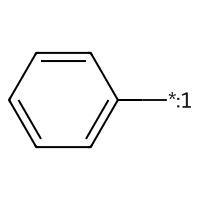
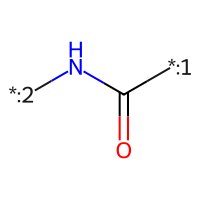
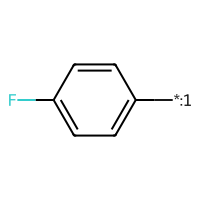
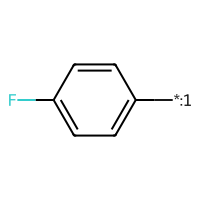
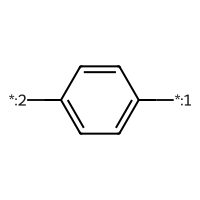
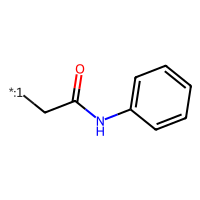
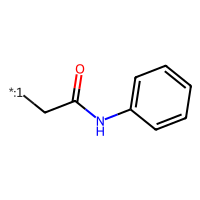
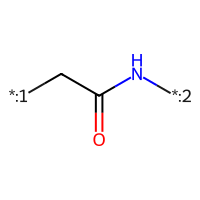
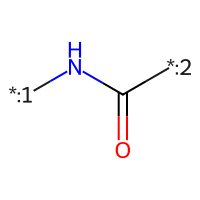
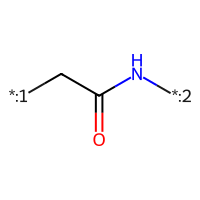

In [149]:
ideas_df

In [150]:
import subprocess

In [157]:
!pip install APSW

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
-s "O=C(CN(c1ccc(F)cc1)S(=O)(=O)c1ccc2c(c1)OCCO2)Nc1ccccc1" AllHepG2.mmpdb -p pCC50

In [1]:
test_smiles = "O=C(CN(c1ccc(F)cc1)S(=O)(=O)c1ccc2c(c1)OCCO2)Nc1ccccc1"

In [ ]:
def generate_ideas(input_smi, prop="pCC50", database="AllHepG2.mmpdb", delta="-1", output=out.tmp):
    subprocess.run(["mmpdb", "transform", "-s", input_smi, 
                    database, "-p", prop, "--where", "avg<"+str(delta), "-o", output])
    ideas_df = pd.read_csv(output,sep="\t")
    
    

In [158]:
subprocess.run(["mmpdb", "transform", "-s", test_smiles, "AllHepG2.mmpdb", "-p", "pCC50", "--where", "avg<-1"])

ID	SMILES	pCC50_from_smiles	pCC50_to_smiles	pCC50_radius	pCC50_fingerprint	pCC50_rule_environment_id	pCC50_count	pCC50_avg	pCC50_std	pCC50_kurtosis	pCC50_skewness	pCC50_min	pCC50_q1	pCC50_median	pCC50_q3	pCC50_max	pCC50_paired_t	pCC50_p_value
1	C/C=C/C(=O)NNC(=O)CN(c1ccc(F)cc1)S(=O)(=O)c1ccc2c(c1)OCCO2	[*:1]c1ccccc1	[*:1]NC(=O)/C=C/C	0	59SlQURkWt98BOD1VlKTGRkiqFDbG6JVkeTJ3ex3bOA	2083041	1	-1.25				-1.25	-1.25	-1.25	-1.25	-1.25		
2	C=CCN(C(=S)NC(=O)CN(c1ccc(F)cc1)S(=O)(=O)c1ccc2c(c1)OCCO2)c1ccccc1	[*:2]NC([*:1])=O	[*:1]C(=O)NC(=S)N([*:2])CC=C	1	IsGBRMuGqMU6Doamz0OuTu6hmhQRk9HPOr/AantVgsQ	1036852	1	-1				-1	-1	-1	-1	-1		
3	C=CN(CC(=O)Nc1ccccc1)S(=O)(=O)c1ccc2c(c1)OCCO2	[*:1]c1ccc(F)cc1	[*:1]C=C	0	59SlQURkWt98BOD1VlKTGRkiqFDbG6JVkeTJ3ex3bOA	1181138	2	-1.125	0.67174			-1.6	-1.6	-1.125	-0.65	-0.65	2.3685	0.25434
4	CC#CCC(CC#CC)N(CC(=O)Nc1ccccc1)S(=O)(=O)c1ccc2c(c1)OCCO2	[*:1]c1ccc(F)cc1	[*:1]C(CC#CC)CC#CC	0	59SlQURkWt98BOD1VlKTGRkiqFDbG6JVkeTJ3ex3bOA	2170694	1	-1.75				-1.75	-1.75	-1.75	-1.

CompletedProcess(args=['mmpdb', 'transform', '-s', 'O=C(CN(c1ccc(F)cc1)S(=O)(=O)c1ccc2c(c1)OCCO2)Nc1ccccc1', 'AllHepG2.mmpdb', '-p', 'pCC50', '--where', 'avg<-1'], returncode=0)

In [1]:
from mmpdb_ideas import generate_ideas

In [3]:
generate_ideas(test_smiles)

Exception: mmpdb is not installed

In [6]:
tox21_df = pd.read_csv("tox21.csv.gz")
tox21_df.head()

,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles
0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX3021,CCOc1ccc2nc(S(N)(=O)=O)sc2c1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3020,CCN1C(=O)NC(c2ccccc2)C1=O
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX3024,CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3027,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX20800,CC(O)(P(=O)(O)O)P(=O)(O)O


In [12]:
tox21_df.loc[:,["smiles","mol_id"]].to_csv("tox21.smi", sep="\t", header=False, index=False)

In [10]:
## Remove problematic structure
tox21_df.drop([1280], inplace=True)

In [ ]:
tox21_df.loc[:,["smiles","mol_id"]].to_csv("tox21.smi", sep="\t", header=False, index=False)

In [13]:
!mmpdb fragment tox21.smi -o Tox21.fragdb

Preparing record 0[15:56:52] WARNING: not removing hydrogen atom without neighbors
Fragmented record 1386/7830 (17.7%)^C
                                   

In [14]:
tox21_df.loc[1385,"smiles"]

'CCCCCCCCCCCCCCBr'

In [17]:
!mmpdb fragment tox21.smi -o Tox21.fragdb

Preparing record 30[16:07:50] WARNING: not removing hydrogen atom without neighbors


In [18]:
tox21_df.columns

Index(['NR-AR', 'NR-AR-LBD', 'NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD',
       'NR-PPAR-gamma', 'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53',
       'mol_id', 'smiles'],
      dtype='object')

In [9]:
tox21_data_df = tox21_df.loc[:,["mol_id",'NR-AR', 'NR-AR-LBD', 'NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD',
       'NR-PPAR-gamma', 'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53']]
tox21_data_df['combined_tox'] = tox21_data_df.loc[:,['NR-AR', 'NR-AR-LBD', 'NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD',
       'NR-PPAR-gamma', 'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53']].sum(axis=1)
# tox21_data_df.fillna(0.5, inplace=True)
tox21_data_df.rename(columns={"mol_id":"id"}, inplace=True)
tox21_data_df.loc[:,["id","combined_tox"]].to_csv("Tox21Data.csv",sep="\t", index=False)

In [10]:
!mmpdb index Tox21.fragdb -o Tox21.mmpdb --properties Tox21Data.csv

In [13]:
from rdkit.Chem import Draw
from rdkit.Chem import MolFromSmiles

In [70]:
test_smiles = "O=S(=O)(c1ccc2c(c1)OCCO2)N(CCO)c1ccc(F)cc1"

In [71]:
#generate_ideas(input_smi, prop="pCC50", database="AllHepG2.mmpdb", delta="-1", output="out.tmp"):
ideas_test = generate_ideas(test_smiles, prop="combined_tox",database="Tox21.mmpdb",delta="-2")

In [22]:
ideas_test

,ID,SMILES,combined_tox_from_smiles,combined_tox_to_smiles,combined_tox_radius,combined_tox_fingerprint,combined_tox_rule_environment_id,combined_tox_count,combined_tox_avg,combined_tox_std,...,combined_tox_q1,combined_tox_median,combined_tox_q3,combined_tox_max,combined_tox_paired_t,combined_tox_p_value,Molecule,qed,sims,sort_by
170,171,O=S(=O)(c1ccc2c(c1)OCCO2)N(CCOC1CCCC1)c1ccc(F)cc1,[*:1]O,[*:1]OC1CCCC1,0,59SlQURkWt98BOD1VlKTGRkiqFDbG6JVkeTJ3ex3bOA,18745697,1,-4.0000,NaN,...,-4.00,-4.0,-4.0,-4,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x121f2d9a0>,0.681313,0.925170,0.8520128296230861
54,55,CSCCN(c1ccc(F)cc1)S(=O)(=O)c1ccc2c(c1)OCCO2,[*:1]O,[*:1]SC,0,59SlQURkWt98BOD1VlKTGRkiqFDbG6JVkeTJ3ex3bOA,18676994,2,-2.5000,2.1213,...,-4.00,-2.5,-1.0,-1,-1.6667,0.34404,<rdkit.Chem.rdchem.Mol object at 0x122016570>,0.767011,0.886364,0.8505578542209276
73,74,NC(=O)CCCN(c1ccc(F)cc1)S(=O)(=O)c1ccc2c(c1)OCCO2,[*:1]O,[*:1]CC(N)=O,0,59SlQURkWt98BOD1VlKTGRkiqFDbG6JVkeTJ3ex3bOA,18752606,1,-3.0000,NaN,...,-3.00,-3.0,-3.0,-3,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x122016dc0>,0.774991,0.867778,0.839941753062653
30,31,CCC(N)CCN(c1ccc(F)cc1)S(=O)(=O)c1ccc2c(c1)OCCO2,[*:1]O,[*:1]C(N)CC,1,y22aLKIej2ajLjm/G+rE6a8A2Pg726/jam4aP+Zjq40,15502641,1,-3.0000,NaN,...,-3.00,-3.0,-3.0,-3,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x122015af0>,0.780862,0.853712,0.8318568849368932
159,160,O=S(=O)(c1ccc2c(c1)OCCO2)N(CCO)c1ccc(C(O)CF)cc1,[*:1]c1ccc([*:2])cc1,[*:1]CC(O)c1ccc([*:2])cc1,0,8RcKhgVxyFGIHOg3PvZ5MD1YdRc7BcXP2EnyPQagHKw,17005992,1,-6.0000,NaN,...,-6.00,-6.0,-6.0,-6,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x121f2d4d0>,0.737592,0.855277,0.819971970977365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,150,O=S(=O)(c1ccc2c(c1)OCCO2)N(CCO)[C@H]1C(O)O[C@H...,[*:1]c1ccc([*:2])cc1,[*:1]C[C@H]1OC(O)[C@H]([*:2])[C@@H](O)[C@H]1O,0,8RcKhgVxyFGIHOg3PvZ5MD1YdRc7BcXP2EnyPQagHKw,17009341,2,-4.0000,2.8284,...,-6.00,-4.0,-2.0,-2,2.0000,0.29517,<rdkit.Chem.rdchem.Mol object at 0x121f2d070>,0.416949,0.478779,0.4602299872111354
150,151,O=S(=O)(c1ccc2c(c1)OCCO2)N(CCO)[C@H]1C(O)O[C@H...,[*:1]c1ccc([*:2])cc1,[*:1][C@H]1[C@H](O)[C@@H]([*:2])C(O)O[C@@H]1CO,0,8RcKhgVxyFGIHOg3PvZ5MD1YdRc7BcXP2EnyPQagHKw,17009290,3,-2.3333,2.5166,...,-4.25,-2.0,-0.5,0,1.6059,0.24952,<rdkit.Chem.rdchem.Mol object at 0x121f2d0e0>,0.416949,0.474227,0.4570435527782992
152,153,O=S(=O)(c1ccc2c(c1)OCCO2)N(CCO)[C@H]1C(O)O[C@H...,[*:1]c1ccc([*:2])cc1,[*:1][C@@H]1[C@H](O)[C@@H]([*:2])C(O)O[C@@H]1CO,0,8RcKhgVxyFGIHOg3PvZ5MD1YdRc7BcXP2EnyPQagHKw,17009347,2,-4.0000,2.8284,...,-6.00,-4.0,-2.0,-2,2.0000,0.29517,<rdkit.Chem.rdchem.Mol object at 0x121f2d1c0>,0.416949,0.474227,0.4570435527782992
93,94,O=C(CS(=O)C(F)N(CCO)S(=O)(=O)c1ccc2c(c1)OCCO2)NO,[*:1]c1ccc([*:2])cc1,[*:1]C([*:2])S(=O)CC(=O)NO,0,8RcKhgVxyFGIHOg3PvZ5MD1YdRc7BcXP2EnyPQagHKw,19233757,1,-3.0000,NaN,...,-3.00,-3.0,-3.0,-3,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x122017680>,0.278844,0.508099,0.43932240214412305


In [75]:
input_rgroups = ideas_test['combined_tox_from_smiles'].unique()

In [81]:
import matplotlib.pyplot as plt

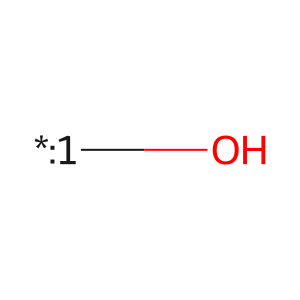

In [83]:
Draw.MolToImage(MolFromSmiles(input_rgroups[0]))

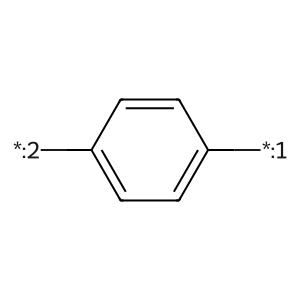

In [84]:
Draw.MolToImage(MolFromSmiles(input_rgroups[1]))

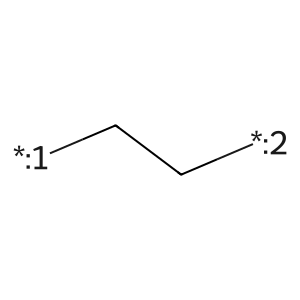

In [87]:
Draw.MolToImage(MolFromSmiles(input_rgroups[2]))

In [97]:
from rdkit.Chem import MolFromSmarts
from rdkit import Chem
def get_highlights(pattern, molecule):
    ## adapted from https://www.rdkit.org/docs/GettingStartedInPython.html
    if isinstance(molecule, str):
        mol = MolFromSmiles(molecule)
    elif isinstance(molecule, Chem.rdchem.Mol):
        mol = molecule
    else:
        raise TypeError('molecule must be either a smiles string or rdkit.Chem.rdchem.Mol object')
    if isinstance(pattern, str):
        patt = MolFromSmarts(pattern)
    else:
        raise TypeError('pattern must be a SMARTS or SMILES string')
    hit_ats = list(mol.GetSubstructMatch(patt))
    hit_bonds = []
    for bond in patt.GetBonds():
        aid1 = hit_ats[bond.GetBeginAtomIdx()]
        aid2 = hit_ats[bond.GetEndAtomIdx()]
        hit_bonds.append(mol.GetBondBetweenAtoms(aid1, aid2).GetIdx())
    return hit_ats, hit_bonds

In [89]:
type(ideas_test.loc[159,'Molecule'])

rdkit.Chem.rdchem.Mol

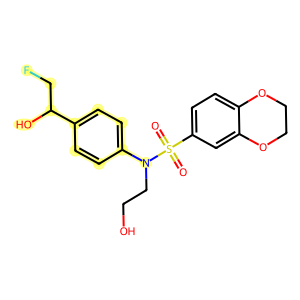

In [123]:
from rdkit.Chem import MolFromSmarts
patt = MolFromSmarts('[*:1]CC(O)c1ccc([*:2])cc1')
hit_ats = list(ideas_test.loc[159,'Molecule'].GetSubstructMatch(patt))
hit_bonds = []
for bond in patt.GetBonds():
    aid1 = hit_ats[bond.GetBeginAtomIdx()]
    aid2 = hit_ats[bond.GetEndAtomIdx()]
    hit_bonds.append(ideas_test.loc[159,'Molecule'].GetBondBetweenAtoms(aid1, aid2).GetIdx())

Draw.MolToImage(ideas_test.loc[159,'Molecule'], highlightAtoms=hit_ats, highlightBonds=hit_bonds, highlightColor=(1,1,0,0.4))

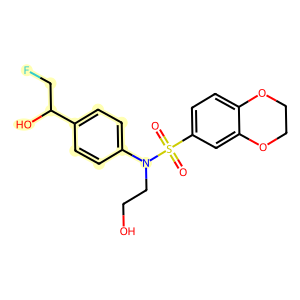

In [98]:
hit_ats, hit_bonds = get_highlights('[*:1]CC(O)c1ccc([*:2])cc1', ideas_test.loc[159,'Molecule'])
# patt = MolFromSmarts('[*:1]CC(O)c1ccc([*:2])cc1')
# hit_ats = list(ideas_test.loc[159,'Molecule'].GetSubstructMatch(patt))
# hit_bonds = []
# for bond in patt.GetBonds():
#     aid1 = hit_ats[bond.GetBeginAtomIdx()]
#     aid2 = hit_ats[bond.GetEndAtomIdx()]
#     hit_bonds.append(ideas_test.loc[159,'Molecule'].GetBondBetweenAtoms(aid1, aid2).GetIdx())

Draw.MolToImage(ideas_test.loc[159,'Molecule'], highlightAtoms=hit_ats, highlightBonds=hit_bonds, highlightColor=(1,1,.7))

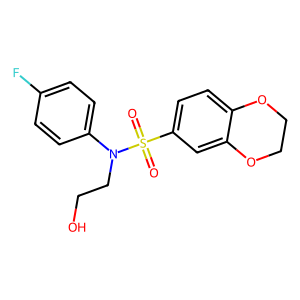

In [14]:
Draw.MolToImage(MolFromSmiles(test_smiles))

In [4]:
import rdkit

In [6]:
ideas_test.reset_index()

,index,ID,SMILES,combined_tox_from_smiles,combined_tox_to_smiles,combined_tox_radius,combined_tox_fingerprint,combined_tox_rule_environment_id,combined_tox_count,combined_tox_avg,...,combined_tox_skewness,combined_tox_min,combined_tox_q1,combined_tox_median,combined_tox_q3,combined_tox_max,combined_tox_paired_t,combined_tox_p_value,Molecule,qed
0,246,247,O=S(=O)(c1ccc2c(c1)OCCO2)N(CCO)c1ccc(F)cc1,[*:1]C(=O)Nc1ccccc1,[*:1]CO,0,59SlQURkWt98BOD1VlKTGRkiqFDbG6JVkeTJ3ex3bOA,19253342,1,-3.0000,...,NaN,-3,-3.00,-3.0,-3.00,-3,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x113e76030>,0.886824
1,136,137,NCCN(c1ccc(F)cc1)S(=O)(=O)c1ccc2c(c1)OCCO2,[*:1]CC(=O)Nc1ccccc1,[*:1]CCN,0,59SlQURkWt98BOD1VlKTGRkiqFDbG6JVkeTJ3ex3bOA,18596038,1,-3.0000,...,NaN,-3,-3.00,-3.0,-3.00,-3,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x113e72f80>,0.886532
2,87,88,CN(c1ccc(F)cc1)S(=O)(=O)c1ccc2c(c1)OCCO2,[*:1]C(=O)Nc1ccccc1,[*:1][H],0,59SlQURkWt98BOD1VlKTGRkiqFDbG6JVkeTJ3ex3bOA,14941716,5,-2.4000,...,0.60374,-3,-3.00,-3.0,-1.75,-1,-6.0,0.003883,<rdkit.Chem.rdchem.Mol object at 0x113e71a10>,0.870354
3,230,231,O=C(O)CN(c1ccc(F)cc1)S(=O)(=O)c1ccc2c(c1)OCCO2,[*:1]C(=O)Nc1ccccc1,[*:1]C(=O)O,0,59SlQURkWt98BOD1VlKTGRkiqFDbG6JVkeTJ3ex3bOA,15181759,3,-2.6667,...,0.38490,-3,-3.00,-3.0,-2.25,-2,-8.0,0.015268,<rdkit.Chem.rdchem.Mol object at 0x113e75930>,0.867323
4,9,10,C=CN(c1ccc(F)cc1)S(=O)(=O)c1ccc2c(c1)OCCO2,[*:1]CC(=O)Nc1ccccc1,[*:1]C=C,0,59SlQURkWt98BOD1VlKTGRkiqFDbG6JVkeTJ3ex3bOA,7334158,1,-3.0000,...,NaN,-3,-3.00,-3.0,-3.00,-3,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x113e4f760>,0.861958
5,28,29,CC(C)(O)CN(c1ccc(F)cc1)S(=O)(=O)c1ccc2c(c1)OCCO2,[*:1]C(=O)Nc1ccccc1,[*:1]C(C)(C)O,1,y22aLKIej2ajLjm/G+rE6a8A2Pg726/jam4aP+Zjq40,14941711,1,-3.0000,...,NaN,-3,-3.00,-3.0,-3.00,-3,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x113e70040>,0.861510
6,69,70,CCN(c1ccc(F)cc1)S(=O)(=O)c1ccc2c(c1)OCCO2,[*:1]C(=O)Nc1ccccc1,[*:1]C,0,59SlQURkWt98BOD1VlKTGRkiqFDbG6JVkeTJ3ex3bOA,18681794,3,-2.3333,...,-0.38490,-3,-3.00,-3.0,-1.50,-1,3.5,0.072827,<rdkit.Chem.rdchem.Mol object at 0x113e71230>,0.860793
7,48,49,CC(O)N(c1ccc(F)cc1)S(=O)(=O)c1ccc2c(c1)OCCO2,[*:1]CC(=O)Nc1ccccc1,[*:1]C(C)O,0,59SlQURkWt98BOD1VlKTGRkiqFDbG6JVkeTJ3ex3bOA,7334086,1,-3.0000,...,NaN,-3,-3.00,-3.0,-3.00,-3,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x113e70900>,0.852462
8,32,33,CC(C)N(c1ccc(F)cc1)S(=O)(=O)c1ccc2c(c1)OCCO2,[*:1]CC(=O)Nc1ccccc1,[*:1]C(C)C,0,59SlQURkWt98BOD1VlKTGRkiqFDbG6JVkeTJ3ex3bOA,7331492,2,-3.0000,...,NaN,-3,-3.00,-3.0,-3.00,-3,100000000.0,NaN,<rdkit.Chem.rdchem.Mol object at 0x113e70200>,0.848788
9,23,24,CC(C)(C)N(c1ccc(F)cc1)S(=O)(=O)c1ccc2c(c1)OCCO2,[*:1]CC(=O)Nc1ccccc1,[*:1]C(C)(C)C,0,59SlQURkWt98BOD1VlKTGRkiqFDbG6JVkeTJ3ex3bOA,7334176,3,-2.3333,...,-0.38490,-3,-3.00,-3.0,-1.50,-1,3.5,0.072827,<rdkit.Chem.rdchem.Mol object at 0x113e4fd80>,0.834088


In [73]:
for idx, idea in enumerate(ideas_test['SMILES']):
    print(idx, idea)

0 O=S(=O)(c1ccc2c(c1)OCCO2)N(CCOC1CCCC1)c1ccc(F)cc1
1 CSCCN(c1ccc(F)cc1)S(=O)(=O)c1ccc2c(c1)OCCO2
2 NC(=O)CCCN(c1ccc(F)cc1)S(=O)(=O)c1ccc2c(c1)OCCO2
3 CCC(N)CCN(c1ccc(F)cc1)S(=O)(=O)c1ccc2c(c1)OCCO2
4 O=S(=O)(c1ccc2c(c1)OCCO2)N(CCO)c1ccc(C(O)CF)cc1
5 O=S(=O)(c1ccc2c(c1)OCCO2)N(CCO[C@@H]1CCCCO1)c1ccc(F)cc1
6 CC(=O)NC(=O)CCN(c1ccc(F)cc1)S(=O)(=O)c1ccc2c(c1)OCCO2
7 CC(C)(C)CC(=O)OCCN(c1ccc(F)cc1)S(=O)(=O)c1ccc2c(c1)OCCO2
8 CC(C)NC(=O)CCN(c1ccc(F)cc1)S(=O)(=O)c1ccc2c(c1)OCCO2
9 O=S(=O)(c1ccc2c(c1)OCCO2)N(CCNC1=NCCN1)c1ccc(F)cc1
10 Cc1cc(F)c(C)c(C)c1N(CCO)S(=O)(=O)c1ccc2c(c1)OCCO2
11 CCOC(=O)NCCOCCN(c1ccc(F)cc1)S(=O)(=O)c1ccc2c(c1)OCCO2
12 O=C(NCCN(c1ccc(F)cc1)S(=O)(=O)c1ccc2c(c1)OCCO2)C(F)(F)F
13 N[C@@H](CCN(c1ccc(F)cc1)S(=O)(=O)c1ccc2c(c1)OCCO2)C(=O)O
14 O=S(=O)(c1ccc2c(c1)OCCO2)N(CC[As](=O)([O-])O)c1ccc(F)cc1
15 O=S(=O)(c1ccc2c(c1)OCCO2)N(CC[As](=O)(O)O)c1ccc(F)cc1
16 O=C(CCN(c1ccc(F)cc1)S(=O)(=O)c1ccc2c(c1)OCCO2)OCCO
17 CC(C)CC(C)NCCN(c1ccc(F)cc1)S(=O)(=O)c1ccc2c(c1)OCCO2
18 CC(C)NC[C@@

In [10]:
!pip install chemfp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 560.4/560.4 kB 6.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [66 lines of output]
      /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/setuptools/dist.py:771: UserWarning: Usage of dash-separated 'author-email' will not be supported in future versions. Please use the underscore name 'author_email' instead
        warnings.warn(
      /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/setuptools/dist.py:771: UserWarning: Usage of dash-separated 'home-page' will not be supported in future versions. Please use the underscore name 'home_page' instead
        warnings.warn(
      /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/setuptools/dist.py:771: UserWarning: Usage of dash-separated 'long-description' wil

In [43]:
import pandas as pd

In [44]:
df = pd.DataFrame({'num_legs': [4, 2], 'num_wings': [0, 2]},
                  index=['dog', 'hawk'])
df

,num_legs,num_wings
dog,4,0
hawk,2,2


In [67]:
for x,y,z in df.itertuples():
    print(x,y,z)

dog 4 0
hawk 2 2


In [61]:
for x in df.loc[:,['num_legs','num_wings']].iterrows():
    print(x[1])

num_legs     4
num_wings    0
Name: dog, dtype: int64
num_legs     2
num_wings    2
Name: hawk, dtype: int64


In [68]:
for idx, val in enumerate(df['num_legs']):
    print(idx, val)

0 4
1 2


In [125]:
import deepchem as dc

2023-04-04 11:34:14.390796: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_geometric'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. cannot import name 'DMPNN' from 'deepchem.models.torch_models' (/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/deepchem/models/torch_models/__init__.py)


In [126]:
tox21_tasks2, tox21_datasets2, transformers2 = dc.molnet.load_tox21(featurizer=dc.feat.RDKitDescriptors(is_normalized=False))

train_dataset2, valid_dataset2, test_dataset2 = tox21_datasets2
train_dataset2

[11:38:00] WARNING: not removing hydrogen atom without neighbors
[11:38:00] WARNING: not removing hydrogen atom without neighbors
[11:38:00] WARNING: not removing hydrogen atom without neighbors
[11:40:00] WARNING: not removing hydrogen atom without neighbors


<DiskDataset X.shape: (6264, 208), y.shape: (6264, 12), w.shape: (6264, 12), task_names: ['NR-AR' 'NR-AR-LBD' 'NR-AhR' ... 'SR-HSE' 'SR-MMP' 'SR-p53']>

In [129]:
from rdkit import Chem

In [128]:
train_dataset2.ids[2000]

'CCOc1ccccc1O'

In [130]:
canon_smiles_list = []
for s in train_dataset2.ids:
    canon_smiles_list.append(Chem.CanonSmiles(s))

[11:44:09] WARNING: not removing hydrogen atom without neighbors


In [131]:
test_smi = 'CCOc1ccccc1O'

In [132]:
test_smi in canon_smiles_list

True

In [156]:
tox21_tasks2, tox21_datasets2, transformers2 = dc.molnet.load_tox21(splitter=None)

In [158]:
tox21_smi = tox21_datasets2[0].ids

In [162]:
tox21_smi.shape

(7831,)

In [163]:
tox21_datasets2[0].y.shape

(7831, 12)

In [165]:
import numpy as np

In [180]:
tox21_df = pd.DataFrame(np.concatenate((np.reshape(tox21_smi, (7831,1)), tox21_datasets2[0].y), axis=1))

In [183]:
tox21_tasks2

['NR-AR',
 'NR-AR-LBD',
 'NR-AhR',
 'NR-Aromatase',
 'NR-ER',
 'NR-ER-LBD',
 'NR-PPAR-gamma',
 'SR-ARE',
 'SR-ATAD5',
 'SR-HSE',
 'SR-MMP',
 'SR-p53']

In [184]:
tox21_df.columns = ['SMILES'] + tox21_tasks2

In [186]:
#tox21_df.to_csv('tox21_y_fromDeepChem.csv')

In [215]:
tox21_df = pd.read_csv('tox21_y_fromDeepChem.csv')

In [174]:
np.reshape(tox21_smi, (7831,1)).shape

(7831, 1)

In [217]:
data = (tox21_df[tox21_df['SMILES'] == test_smi])

In [231]:
data

,Unnamed: 0,SMILES,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,fp
1152,1152,CCOc1ccccc1O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...


In [232]:
test_df = data.T.drop(['SMILES', 'fp','Unnamed: 0'])

In [225]:
test_df

,1152
NR-AR,0.0
NR-AR-LBD,0.0
NR-AhR,0.0
NR-Aromatase,0.0
NR-ER,0.0
NR-ER-LBD,0.0
NR-PPAR-gamma,0.0
SR-ARE,0.0
SR-ATAD5,0.0
SR-HSE,0.0


In [226]:
test_df.reset_index(inplace=True)

In [227]:
test_df.columns = ['Assay Name', 'Prob Tox']

In [228]:
def get_tox_class(prob_true):
	if prob_true > 0.6:
		return "Likely toxic"
	elif prob_true < 0.4:
		return "Likely non-toxic"
	else:
		return "Inconclusive"

In [229]:
test_df['Probability of Toxicity'] = test_df['Prob Tox'].astype(float).map(lambda n: '{:.2%}'.format(n))
test_df['tox_class'] = test_df['Prob Tox'].apply(get_tox_class)
test_df.rename(columns={'tox_class':'Toxicity Class'}, inplace=True)

In [230]:
test_df.loc[1:,['Assay Name', 'Toxicity Class', 'Probability of Toxicity']]

,Assay Name,Toxicity Class,Probability of Toxicity
1,NR-AR-LBD,Likely non-toxic,0.00%
2,NR-AhR,Likely non-toxic,0.00%
3,NR-Aromatase,Likely non-toxic,0.00%
4,NR-ER,Likely non-toxic,0.00%
5,NR-ER-LBD,Likely non-toxic,0.00%
6,NR-PPAR-gamma,Likely non-toxic,0.00%
7,SR-ARE,Likely non-toxic,0.00%
8,SR-ATAD5,Likely non-toxic,0.00%
9,SR-HSE,Likely non-toxic,0.00%
10,SR-MMP,Likely non-toxic,0.00%


In [236]:
mols = [Chem.MolFromSmiles(x) for x in tox21_df['SMILES']]
fps = [Chem.RDKFingerprint(x) for x in mols]

[21:49:29] WARNING: not removing hydrogen atom without neighbors


In [238]:
from rdkit import DataStructs

In [240]:
example_fp = Chem.RDKFingerprint(Chem.MolFromSmiles(test_smi))

In [241]:
sims = DataStructs.BulkTanimotoSimilarity(example_fp, fps)

In [244]:
inds = np.argpartition(sims, -4)[-4:]
inds

array([1852, 5947, 1152, 6544])

In [245]:
tox21_df.iloc[inds,:]

,Unnamed: 0,SMILES,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,fp
1852,1852,COc1ccccc1O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...
5947,5947,CC(C)Oc1ccccc1O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...
1152,1152,CCOc1ccccc1O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...
6544,6544,CCOc1ccccc1OCC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...


In [249]:
tox21_df.loc[:,tox21_tasks2].sum(axis=1)

0       2.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7826    0.0
7827    3.0
7828    5.0
7829    6.0
7830    1.0
Length: 7831, dtype: float64